### Kaggle Link: [Click here](https://www.kaggle.com/code/nyinyeinaung/space-titanic-prediction-using-rnn)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv');
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


* PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
* HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
* CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
* Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
* Destination - The planet the passenger will be debarking to.
* Age - The age of the passenger.
* VIP - Whether the passenger has paid for special VIP service during the voyage.
* RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
* Name - The first and last names of the passenger.
* Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict

In [3]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [6]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

<Axes: ylabel='Frequency'>

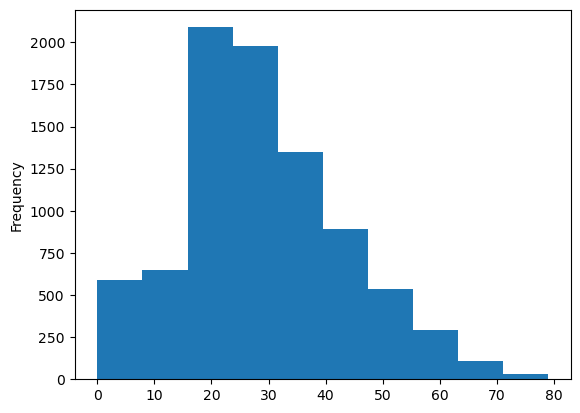

In [7]:
df['Age'].plot(kind='hist')

In [8]:
#Fill null values with Mean age
df['Age'] = df['Age'].fillna(value=df['Age'].mean())

In [9]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age               0
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

<Axes: >

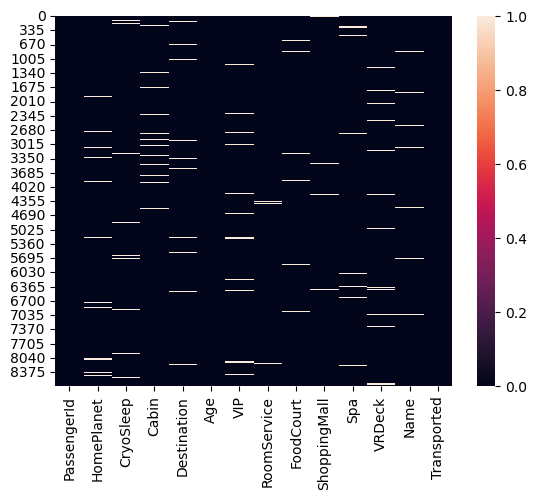

In [10]:
sns.heatmap(df.isnull())

In [11]:
#fill the null values of Cabin features with dummy value
df['Cabin'].fillna('Z/9999/Z', inplace=True)

#split Cabin feature into CabinDeck, CabinNum and Cabin Side columns
df['CabinDeck']=df['Cabin'].apply(lambda x: x.split('/')[0])
df['CabinNum']=df['Cabin'].apply(lambda x: x.split('/')[1])
df['CabinSide']=df['Cabin'].apply(lambda x: x.split('/')[2])

In [12]:
#revert the dummy values placed earlier to Null values
df['CabinSide'][df['CabinSide']=='Z'] = np.NAN
df['CabinDeck'][df['CabinDeck']=='Z'] = np.NAN

/tmp/ipykernel_22/3518769577.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CabinSide'][df['CabinSide']=='Z'] = np.NAN
/tmp/ipykernel_22/3518769577.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CabinDeck'][df['CabinDeck']=='Z'] = np.NAN


In [13]:
#Filling nulls  in categorical features using ffill method
catFeats=['HomePlanet', 'CryoSleep', 'Destination', 'VIP','CabinDeck','CabinSide']

for i,varName in enumerate(catFeats):
    df[varName].fillna(method='ffill',inplace=True)


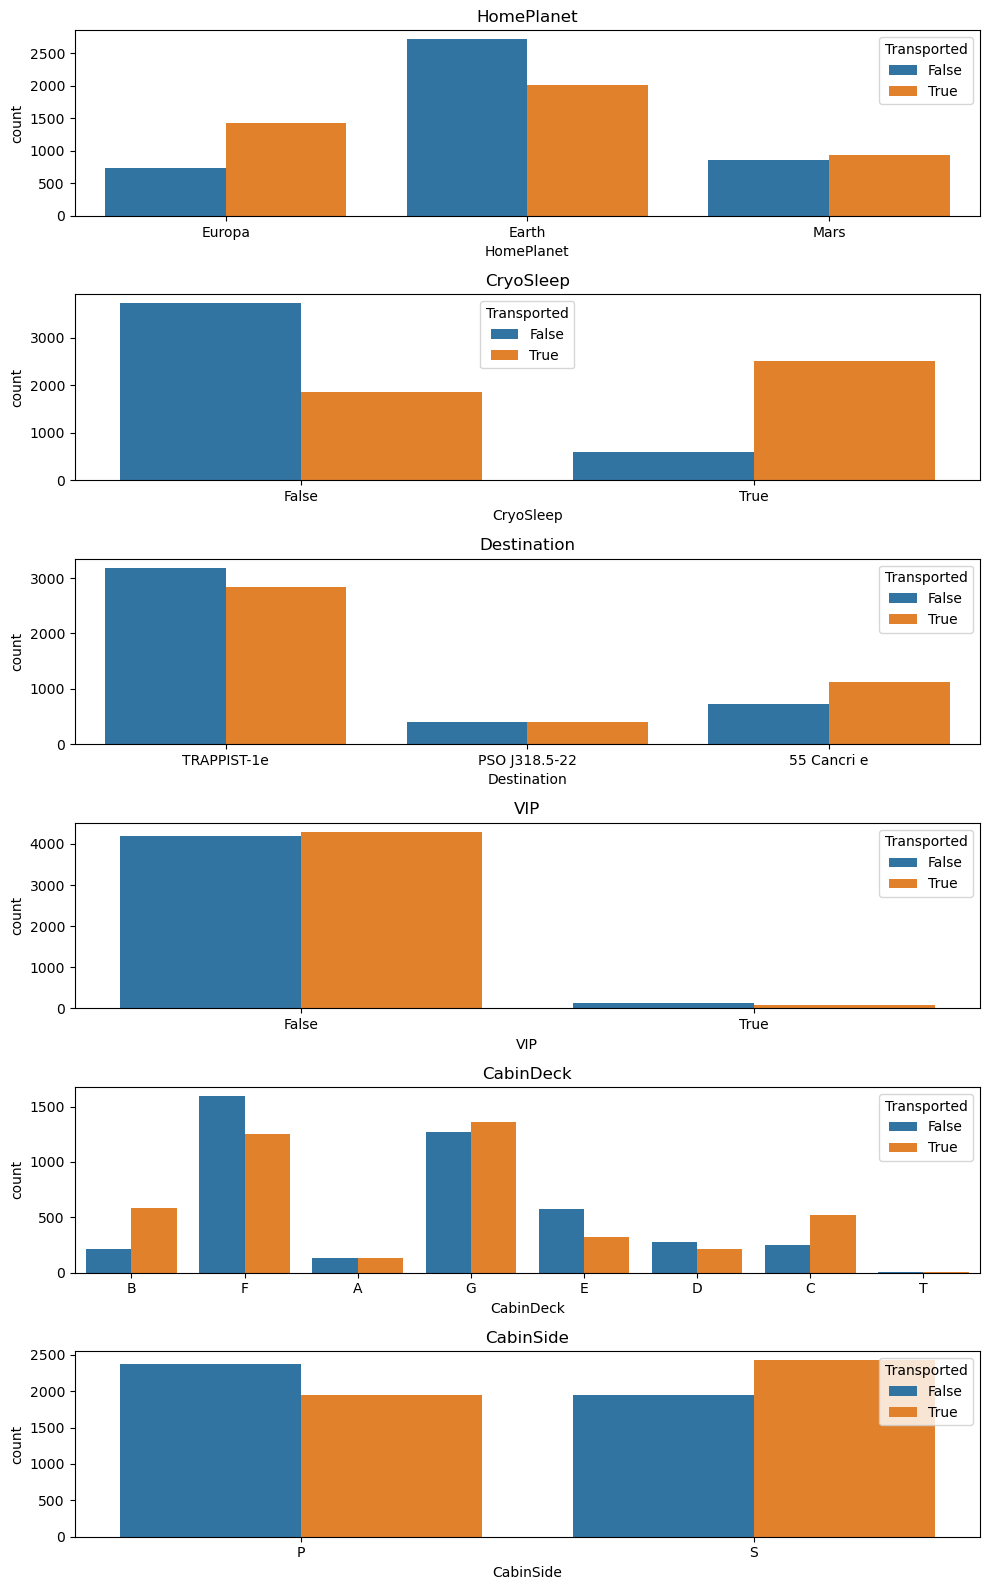

In [14]:
# Categorical features
catFeats=['HomePlanet', 'CryoSleep', 'Destination', 'VIP','CabinDeck','CabinSide']

# Plot categorical features
fig=plt.figure(figsize=(10,16))
for i, var_name in enumerate(catFeats):
    ax=fig.add_subplot(6,1,i+1)
    sns.countplot(data=df, x=var_name, axes=ax, hue='Transported')
    ax.set_title(var_name)
fig.tight_layout()  # Improves appearance a bit
plt.show()

In [15]:
from sklearn.preprocessing import LabelEncoder

#turn categorical data into numeric data
lb = LabelEncoder()
catFeats=['HomePlanet', 'CryoSleep', 'Destination', 'VIP','CabinDeck','CabinSide','Transported']
for i, varName in enumerate(catFeats):
    df[varName] = lb.fit_transform(df[varName])


In [16]:
#Turning CabinNum Feature to Int then reverting the dummy value back to Null
df['CabinNum'] = df['CabinNum'].astype(int)
df['CabinNum'][df['CabinNum']==9999] = np.NAN

/tmp/ipykernel_22/641740617.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CabinNum'][df['CabinNum']==9999] = np.NAN


In [17]:
#Replacing Null values in numeric features with means

In [18]:
df['RoomService'].fillna(df['RoomService'].mean(), inplace=True)
df['FoodCourt'].fillna(df['FoodCourt'].mean(), inplace=True)
df['Spa'].fillna(df['Spa'].mean(), inplace=True)
df['VRDeck'].fillna(df['VRDeck'].mean(), inplace=True)
df['ShoppingMall'].fillna(df['ShoppingMall'].mean(), inplace=True)
df['CabinNum'].fillna(df['CabinNum'].mean(), inplace=True)

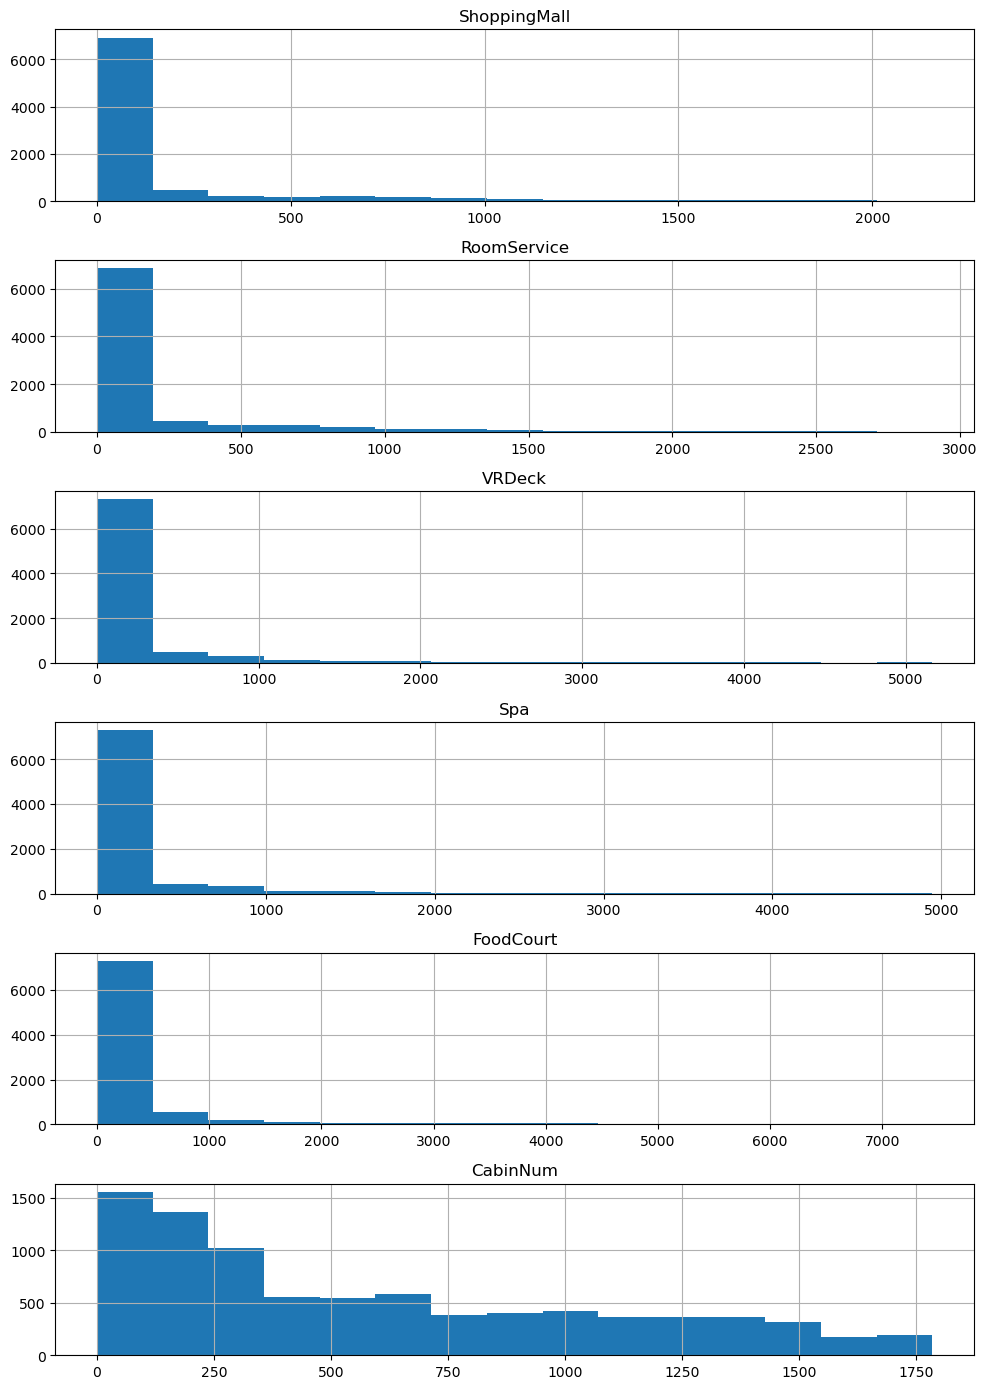

In [19]:
numFeats = ['ShoppingMall','RoomService','VRDeck','Spa','FoodCourt','CabinNum']

##plotted the graphs without the last 100 largest instances to show a better distribution

fig=plt.figure(figsize=(10,14))
#plot hist of numeric features
for i, varName in enumerate(numFeats):
    ax=fig.add_subplot(6,1,i+1)
    df[varName].sort_values()[:-100].hist(bins=15)
    ax.set_title(varName)
fig.tight_layout()  # Improves appearance a bit
plt.show()


In [20]:
#Dropping Name, Cabin and PassangerId Features because unncesssary
df = df.drop(['PassengerId','Name','Cabin'],axis=1)

<Axes: >

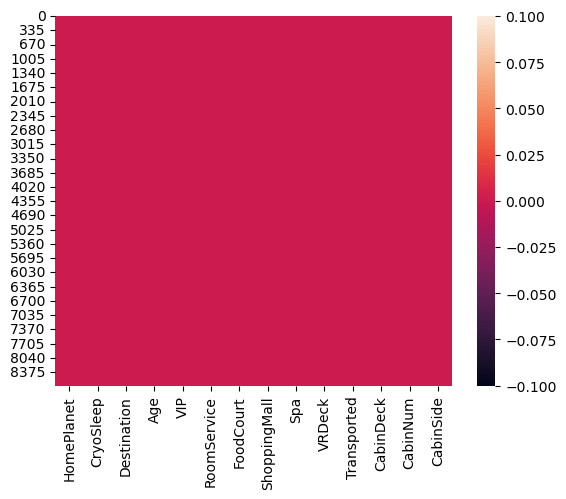

In [21]:
sns.heatmap(df.isnull())

In [22]:
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,CabinDeck,CabinNum,CabinSide
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,0,1,0.0,0
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,1,5,0.0,1
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,0,0.0,1
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,0,0.0,1
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,1,5,1.0,1


# Training Model

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

#split Target class from df
X = df.drop('Transported',axis=1).values
y = df['Transported'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [24]:
X_train.shape

(5824, 13)

In [25]:
scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

#model without normalization
model = Sequential()

model.add(Dense(13,activation='relu'))

model.add(Dense(13,activation='relu'))
model.add(Dense(13,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [27]:
unNormModel = model.fit(x=X_train,y=y_train,
                       epochs=100,
                       validation_data=(X_test,y_test),
                       verbose=1)

Epoch 1/100
182/182 [==============================] - 6s 6ms/step - loss: 10.6253 - accuracy: 0.7057 - val_loss: 4.5203 - val_accuracy: 0.7051
Epoch 2/100
182/182 [==============================] - 1s 4ms/step - loss: 3.2690 - accuracy: 0.7323 - val_loss: 2.7561 - val_accuracy: 0.6636
Epoch 3/100
182/182 [==============================] - 1s 4ms/step - loss: 2.6684 - accuracy: 0.7246 - val_loss: 2.6965 - val_accuracy: 0.7299
Epoch 4/100
182/182 [==============================] - 1s 5ms/step - loss: 2.0197 - accuracy: 0.7318 - val_loss: 1.9679 - val_accuracy: 0.7309
Epoch 5/100
182/182 [==============================] - 1s 4ms/step - loss: 1.9589 - accuracy: 0.7236 - val_loss: 1.6053 - val_accuracy: 0.7278
Epoch 6/100
182/182 [==============================] - 1s 5ms/step - loss: 1.4766 - accuracy: 0.7284 - val_loss: 1.4619 - val_accuracy: 0.7267
Epoch 7/100
182/182 [==============================] - 1s 5ms/step - loss: 1.3862 - accuracy: 0.7304 - val_loss: 1.2766 - val_accuracy: 0.719

<Axes: >

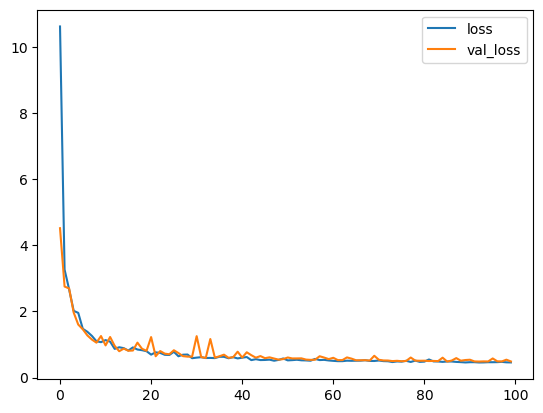

In [28]:
unNormLoss = {'loss':unNormModel.model.history.history['loss'],'val_loss':unNormModel.model.history.history['val_loss']}
unNormLoss = pd.DataFrame(unNormLoss)
unNormLoss.plot()

<Axes: >

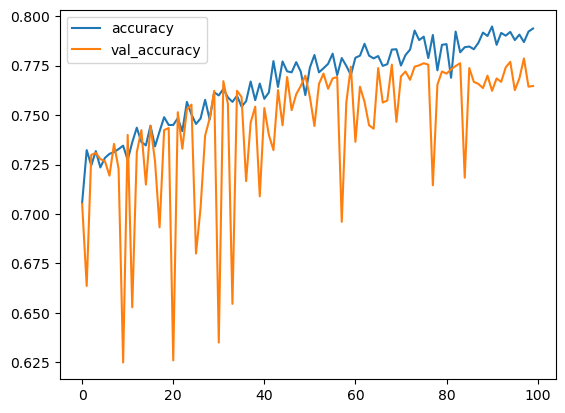

In [29]:
unNormAcc = {'accuracy':unNormModel.model.history.history['accuracy'],'val_accuracy':unNormModel.model.history.history['val_accuracy']}
unNormAcc = pd.DataFrame(unNormAcc)
unNormAcc.plot()

In [30]:
#model with normalization
model = Sequential()

model.add(Dense(13,activation='relu'))

model.add(Dense(13,activation='relu'))
model.add(Dense(13,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [31]:
normModel = model.fit(x=X_train_norm,y=y_train,
                       epochs=100,
                       validation_data=(X_test_norm,y_test),
                       verbose=1)

Epoch 1/100
182/182 [==============================] - 2s 5ms/step - loss: 0.6556 - accuracy: 0.6528 - val_loss: 0.6061 - val_accuracy: 0.7016
Epoch 2/100
182/182 [==============================] - 1s 4ms/step - loss: 0.5625 - accuracy: 0.7143 - val_loss: 0.5424 - val_accuracy: 0.7267
Epoch 3/100
182/182 [==============================] - 1s 5ms/step - loss: 0.5265 - accuracy: 0.7356 - val_loss: 0.5221 - val_accuracy: 0.7337
Epoch 4/100
182/182 [==============================] - 1s 5ms/step - loss: 0.5035 - accuracy: 0.7488 - val_loss: 0.5088 - val_accuracy: 0.7341
Epoch 5/100
182/182 [==============================] - 1s 5ms/step - loss: 0.4844 - accuracy: 0.7601 - val_loss: 0.4884 - val_accuracy: 0.7539
Epoch 6/100
182/182 [==============================] - 1s 5ms/step - loss: 0.4697 - accuracy: 0.7721 - val_loss: 0.4770 - val_accuracy: 0.7672
Epoch 7/100
182/182 [==============================] - 1s 5ms/step - loss: 0.4555 - accuracy: 0.7840 - val_loss: 0.4671 - val_accuracy: 0.7567

<Axes: >

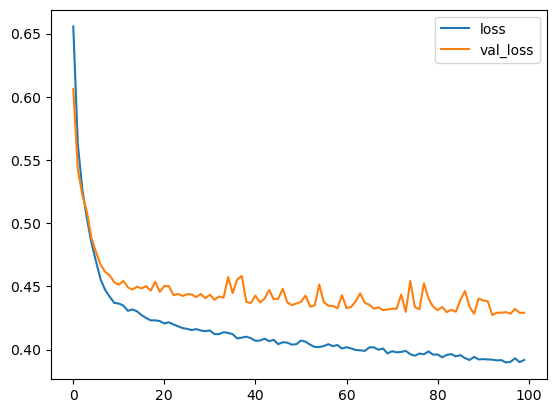

In [32]:
normLosses = {'loss':normModel.model.history.history['loss'],'val_loss':normModel.model.history.history['val_loss']}
normLosses = pd.DataFrame(normLosses)
normLosses.plot()

<Axes: >

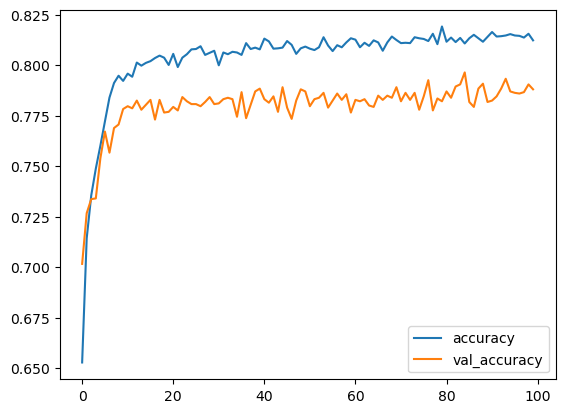

In [33]:
normAcc = {'accuracy':normModel.model.history.history['accuracy'],'val_accuracy':normModel.model.history.history['val_accuracy']}
normAcc = pd.DataFrame(normAcc)
normAcc.plot()

In [34]:
print('Model with normalization: ',normModel.model.evaluate(X_test_norm,y_test))
print('Model without normalization: ',unNormModel.model.evaluate(X_test,y_test))

90/90 [==============================] - 0s 2ms/step - loss: 0.4291 - accuracy: 0.7881
Model with normalization:  [0.4291110038757324, 0.7880794405937195]
90/90 [==============================] - 0s 2ms/step - loss: 0.4879 - accuracy: 0.7647
Model without normalization:  [0.48789724707603455, 0.7647264003753662]


# will use the model with normalization for the real testing data

In [35]:
df = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')
df.head()

output = pd.DataFrame(df['PassengerId'],columns=['PassengerId'])

In [36]:
#apply the preprocessing techniques to the test dataset

##categorial data

#fill the null values of Cabin features with dummy value
df['Cabin'].fillna('Z/9999/Z', inplace=True)

#split Cabin feature into CabinDeck, CabinNum and Cabin Side columns
df['CabinDeck']=df['Cabin'].apply(lambda x: x.split('/')[0])
df['CabinNum']=df['Cabin'].apply(lambda x: x.split('/')[1])
df['CabinSide']=df['Cabin'].apply(lambda x: x.split('/')[2])

#revert the dummy values placed earlier to Null values
df['CabinSide'][df['CabinSide']=='Z'] = np.NAN
df['CabinDeck'][df['CabinDeck']=='Z'] = np.NAN

#Filling nulls  in categorical features using ffill method
catFeats=['HomePlanet', 'CryoSleep', 'Destination', 'VIP','CabinDeck','CabinSide']

for i,varName in enumerate(catFeats):
    df[varName].fillna(method='ffill',inplace=True)

/tmp/ipykernel_22/792369027.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CabinSide'][df['CabinSide']=='Z'] = np.NAN
/tmp/ipykernel_22/792369027.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CabinDeck'][df['CabinDeck']=='Z'] = np.NAN


In [37]:
#Categorical Data into Numeric Data
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
catFeats=['HomePlanet', 'CryoSleep', 'Destination', 'VIP','CabinDeck','CabinSide']
for i, varName in enumerate(catFeats):
    df[varName] = lb.fit_transform(df[varName])

In [38]:
##Numerical data
df['Age'] = df['Age'].fillna(value=df['Age'].mean())
df['RoomService'].fillna(df['RoomService'].mean(), inplace=True)
df['FoodCourt'].fillna(df['FoodCourt'].mean(), inplace=True)
df['Spa'].fillna(df['Spa'].mean(), inplace=True)
df['VRDeck'].fillna(df['VRDeck'].mean(), inplace=True)
df['ShoppingMall'].fillna(df['ShoppingMall'].mean(), inplace=True)
df['CabinNum'].fillna(df['CabinNum'].mean(), inplace=True)

In [39]:
#Dropping Name, Cabin and PassangerId Features because unncesssary
df = df.drop(['PassengerId','Name','Cabin'],axis=1)

In [40]:
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CabinDeck,CabinNum,CabinSide
0,0,1,2,27.0,0,0.0,0.0,0.0,0.0,0.0,6,3,1
1,0,0,2,19.0,0,0.0,9.0,0.0,2823.0,0.0,5,4,1
2,1,1,0,31.0,0,0.0,0.0,0.0,0.0,0.0,2,0,1
3,1,0,2,38.0,0,0.0,6652.0,0.0,181.0,585.0,2,1,1
4,0,0,2,20.0,0,10.0,0.0,635.0,0.0,0.0,5,5,1


In [41]:
scaler = MinMaxScaler()

norm_X_test = scaler.fit_transform(df)

In [42]:
yProbs = normModel.model.predict(norm_X_test)
yProbs

134/134 [==============================] - 0s 1ms/step


array([[0.42594057],
       [0.01211801],
       [0.98009413],
       ...,
       [0.9199623 ],
       [0.93019205],
       [0.55028033]], dtype=float32)

In [43]:
predictions = (model.predict(norm_X_test) > 0.5).astype("int")
output['Transported'] = predictions
output['Transported']=output['Transported'].apply(lambda x: 'True' if x==1 else 'False')

134/134 [==============================] - 0s 2ms/step


In [44]:
output

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [45]:
output.to_csv('submission.csv', index=False)
print('Submission Created!')

Submission Created!
